In [3]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from google.colab import files

#Upload the Dataset
uploaded = files.upload()
data = pd.read_csv('Uber-Jan-Feb-FOIL.csv')

# Data Preprocessing
data['date'] = pd.to_datetime(data['date'], format='%m/%d/%Y')
data['day'] = data['date'].dt.day
data['month'] = data['date'].dt.month
data['day_of_week'] = data['date'].dt.dayofweek  # 0=Monday, 6=Sunday

# Encoding the dispatching base number using one-hot encoding
data_encoded = pd.get_dummies(data, columns=['dispatching_base_number'], drop_first=True)

# Exploratory Data Analysis (EDA)
sns.set(style="whitegrid")

Saving Uber-Jan-Feb-FOIL.csv to Uber-Jan-Feb-FOIL.csv


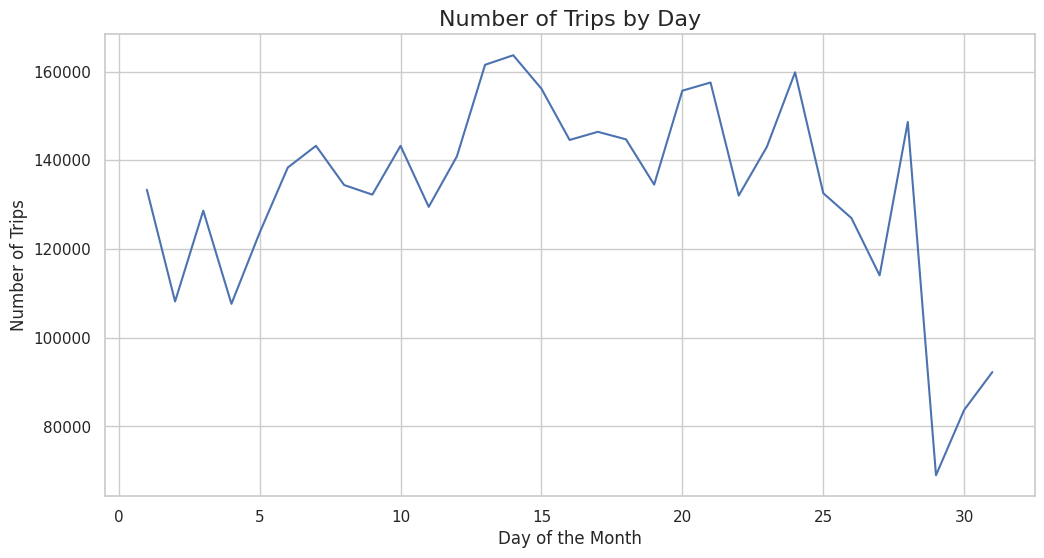

In [4]:
# 1. Number of trips by day
plt.figure(figsize=(12, 6))
sns.lineplot(data=data.groupby('day')['trips'].sum().reset_index(), x='day', y='trips')
plt.title("Number of Trips by Day", fontsize=16)
plt.xlabel("Day of the Month", fontsize=12)
plt.ylabel("Number of Trips", fontsize=12)
plt.show()

<ipython-input-5-472729e3e380>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data.groupby('day_of_week')['trips'].sum().reset_index(), x='day_of_week', y='trips', palette='viridis')


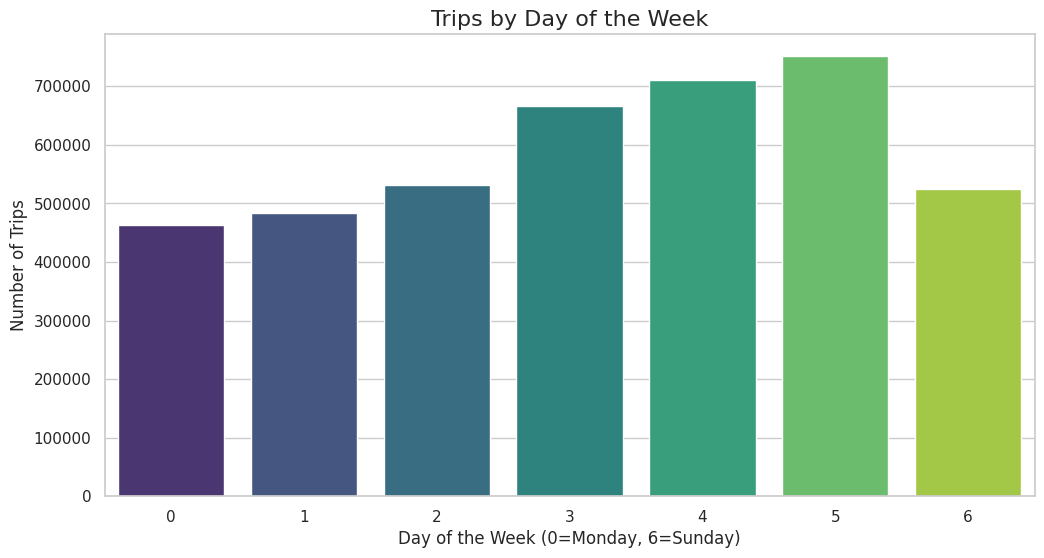

In [5]:
# 2. Trips by day of the week
plt.figure(figsize=(12, 6))
sns.barplot(data=data.groupby('day_of_week')['trips'].sum().reset_index(), x='day_of_week', y='trips', palette='viridis')
plt.title("Trips by Day of the Week", fontsize=16)
plt.xlabel("Day of the Week (0=Monday, 6=Sunday)", fontsize=12)
plt.ylabel("Number of Trips", fontsize=12)
plt.show()

<ipython-input-6-7d30918242a6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data.groupby('dispatching_base_number')['trips'].sum().reset_index(), x='dispatching_base_number', y='trips', palette='plasma')


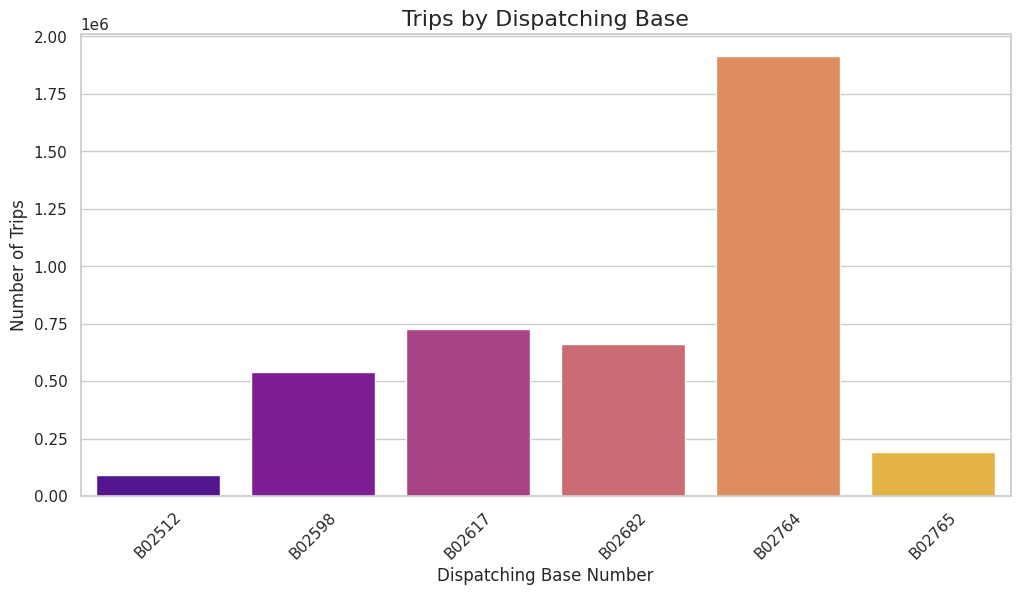

In [6]:
# 3. Trips by dispatching base
plt.figure(figsize=(12, 6))
sns.barplot(data=data.groupby('dispatching_base_number')['trips'].sum().reset_index(), x='dispatching_base_number', y='trips', palette='plasma')
plt.title("Trips by Dispatching Base", fontsize=16)
plt.xlabel("Dispatching Base Number", fontsize=12)
plt.ylabel("Number of Trips", fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [7]:
# Feature Engineering
X = data_encoded.drop(columns=['date', 'trips'])
y = data_encoded['trips']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Building: Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Model Evaluation: Random Forest
y_pred_rf = rf_model.predict(X_test)
print("Random Forest - Mean Squared Error:", mean_squared_error(y_test, y_pred_rf))
print("Random Forest - R^2 Score:", r2_score(y_test, y_pred_rf))

# Model Building: XGBoost
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

# Model Evaluation: XGBoost
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost - Mean Squared Error:", mean_squared_error(y_test, y_pred_xgb))
print("XGBoost - R^2 Score:", r2_score(y_test, y_pred_xgb))

Random Forest - Mean Squared Error: 1571358.7030747659
Random Forest - R^2 Score: 0.9869284521862113
XGBoost - Mean Squared Error: 1672756.0
XGBoost - R^2 Score: 0.9860849380493164


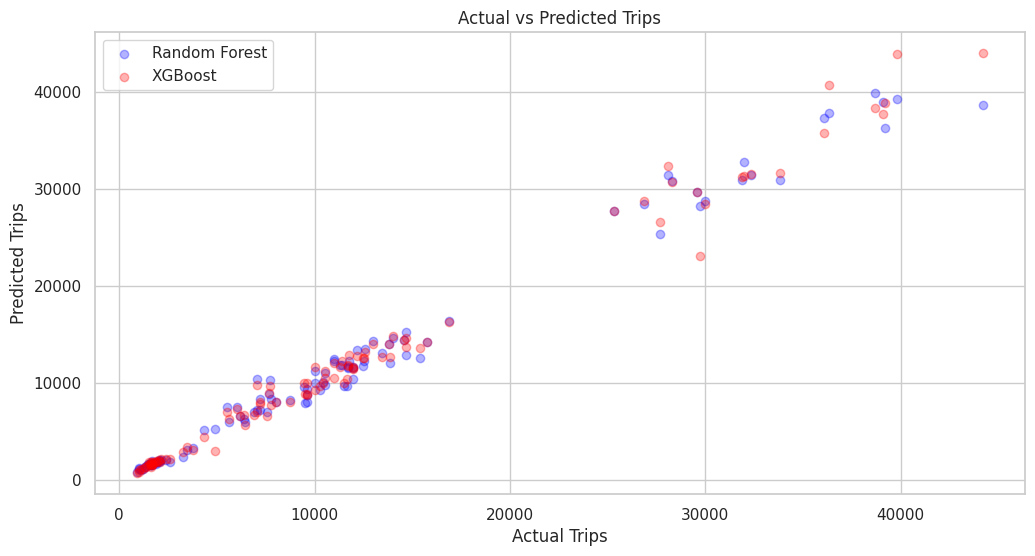

In [8]:
# Visualization of Predictions
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.3, label="Random Forest", color="blue")
plt.scatter(y_test, y_pred_xgb, alpha=0.3, label="XGBoost", color="red")
plt.xlabel("Actual Trips")
plt.ylabel("Predicted Trips")
plt.title("Actual vs Predicted Trips")
plt.legend()
plt.show()